## Load data

In [1]:
import csv

class Repository(object):
    def __init__(self,fileName):
        self.fileName = fileName
    def  loadData(self,inputColumnFst,inputColumnSnd,outputColumn,):
        data=[]
        columns=[]
        file = open(self.fileName)
        parsedData = csv.reader(file,delimiter=',')
       
        noLines = 0
        for line in parsedData:
            if noLines == 0:
                columns = line
            else:
                data.append(line)
            noLines += 1
        
        
        inputColumnIndexFst = columns.index(inputColumnFst)
        inputColumnIndexSnd = columns.index(inputColumnSnd)
        outputColumnIndex = columns.index(outputColumn)
    
        inputDataFst = []
        inputDataSnd = []
        outputData = []
        for j in range(len(data)):
            inputDataFst.append(float(data[j][inputColumnIndexFst]))
            inputDataSnd.append(float(data[j][inputColumnIndexSnd]))
            outputData.append(float(data[j][outputColumnIndex]))
        
        file.close()
        
        return inputDataFst,inputDataSnd,outputData

In [2]:
filename = "data.csv"
repository = Repository(filename)
inputColumnFst = 'Economy..GDP.per.Capita.'
inputColumnSnd = 'Freedom'

outputColumn = 'Happiness.Score'
inputDataResultFst,inputDataResultSnd,outputDataResult = repository.loadData(inputColumnFst,inputColumnSnd, outputColumn)
print('inputs for column '+inputColumnFst +' is: \n'+str(inputDataResultFst)+'\n')
print('inputs for column '+inputColumnSnd +' is: \n'+str(inputDataResultSnd)+'\n')
print('outputs for column '+outputColumn +' is: \n'+str(outputDataResult)+'\n')

inputs for column Economy..GDP.per.Capita. is: 
[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.50394463539124, 1.47920441627502, 1.40570604801178, 1.49438726902008, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 1.21755969524384, 0.872001945972443, 1.23374843597412, 1.43092346191406, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 1.29121541976929, 0.737299203872681, 1.00082039833069, 0.909784495830536, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.091864466667

### defining function for plotting the inputData and the outputData

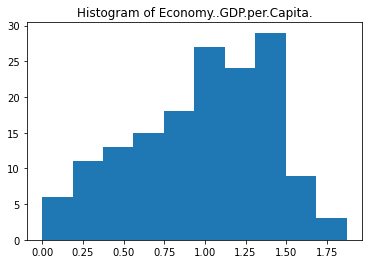

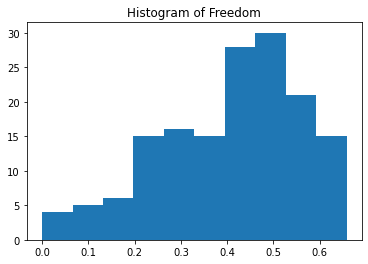

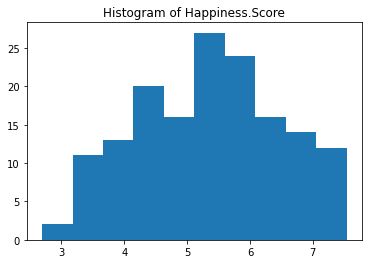

In [3]:
import matplotlib.pyplot as plt 

def plotDataHistogram(x, columnName):
    plt.hist(x, 10)
    plt.title('Histogram of ' + columnName)
    plt.show()
    
plotDataHistogram(inputDataResultFst,inputColumnFst)
plotDataHistogram(inputDataResultSnd,inputColumnSnd)
plotDataHistogram(outputDataResult,outputColumn)

### defining plotting for the training data inputs

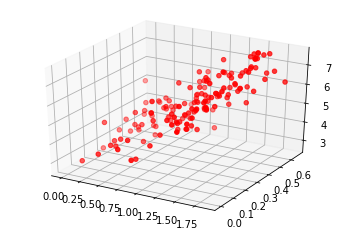

In [4]:
import numpy as np

fig = plt.figure()
ax = plt.axes(projection="3d")



z_points = np.array(outputDataResult)
x_points = np.array(inputDataResultFst)
y_points = np.array(inputDataResultSnd) 
ax.scatter(x_points, y_points, z_points, color="r")

plt.show()

### separating training data from test data 20%-80%

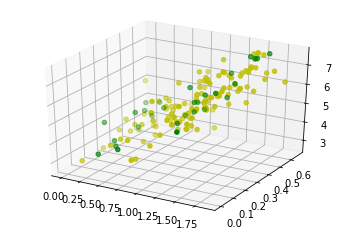

In [5]:
import numpy as np 
import math

np.random.seed(5)

# generate the positions of the data that will be a part of the test data
noTestDataIndexes = math.floor( 0.2 * len(inputDataResultFst))
testDataIndexes = []
for index in range(0,noTestDataIndexes):
    testDataIndexes.append(np.random.randint(0,len(inputDataResultFst)))

inputTestFst = []
inputTestSnd = []
outputTest = []
inputTrainingFst = []
inputTrainingSnd = []
outputTraining = []
for i in range (0,len(inputDataResultFst)):
    if i in testDataIndexes :
        inputTestFst.append(inputDataResultFst[i])
        inputTestSnd.append(inputDataResultSnd[i])
        outputTest.append(outputDataResult[i])
    else:
        inputTrainingFst.append(inputDataResultFst[i])
        inputTrainingSnd.append(inputDataResultSnd[i])
        outputTraining.append(outputDataResult[i])

# plotting differently the training and the test data 
import numpy as np

fig = plt.figure()
ax = plt.axes(projection="3d")



z_points_test = np.array(outputTest)
x_points_test = np.array(inputTestFst)
y_points_test = np.array(inputTestSnd) 
ax.scatter(x_points_test, y_points_test, z_points_test, color="g")

z_points_training = np.array(outputTraining)
x_points_training = np.array(inputTrainingFst)
y_points_training = np.array(inputTrainingSnd) 
ax.scatter(x_points_training, y_points_training, z_points_training, color="y")

plt.show()

    **Multivariate linear-regression using BatchGD (tool)**

In [6]:
from sklearn import linear_model
from sklearn.preprocessing import normalize
# preparing the input data for the regressor ( matrix with one column - only one feature)
xx=[]
for e in range(0,len(inputTrainingFst)):
    xx.append([inputTrainingFst[e],inputTrainingSnd[e]])
normalize(xx,copy=False)
#initialzie parameters for the learnt model
w0 = 0
w1 = 0
w2 = 0
noOfIterations = 400
regressor = linear_model.SGDRegressor(loss='squared_loss',alpha = 0.11,shuffle=False,learning_rate='optimal')

# batch GD implies that after each iteration , the regressor's model is updated
for it in range(0,noOfIterations):
    # for each epoch the regressor updates the learnt model
    regressor.partial_fit(xx,outputTraining)
    # saving the learnt model after each epoch
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print('The learnt model in epoch '+str((it+1))+'is f(x) = ', w0, ' + ', w1, ' * x1', ' + ', w2, ' * x2')
    
print('The final learnt model is f(x) = ', w0, ' + ', w1, ' * x1', ' + ', w2, ' * x2')

The learnt model in epoch 1is f(x) =  [-8.40322174]  +  3.433794561355198  * x1  +  30.1035460173759  * x2
The learnt model in epoch 2is f(x) =  [-4.18698292]  +  4.113966814180456  * x1  +  15.321335162820567  * x2
The learnt model in epoch 3is f(x) =  [-2.27554961]  +  3.6229769766250555  * x1  +  10.363777535978217  * x2
The learnt model in epoch 4is f(x) =  [-1.13775195]  +  3.1969678226059157  * x1  +  7.890496452714235  * x2
The learnt model in epoch 5is f(x) =  [-0.37132369]  +  2.8830257299373088  * x1  +  6.412645555179699  * x2
The learnt model in epoch 6is f(x) =  [0.18439893]  +  2.652767778310195  * x1  +  5.431771660918605  * x2
The learnt model in epoch 7is f(x) =  [0.60746153]  +  2.479896648865883  * x1  +  4.733805874677354  * x2
The learnt model in epoch 8is f(x) =  [0.94096417]  +  2.346425897529117  * x1  +  4.211825254334944  * x2
The learnt model in epoch 9is f(x) =  [1.21092785]  +  2.2406390314556033  * x1  +  3.806626750593232  * x2
The learnt model in epoch 1

### plotting the linear learnt model from the training data

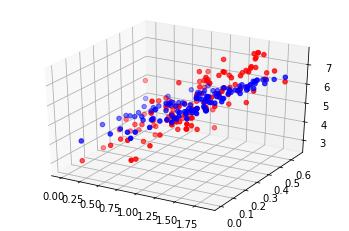

In [7]:

import numpy as np
# if using a Jupyter notebook, include:
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection="3d")
#ax = fig.add_subplot(111,projection="3d")


z_points = np.array(outputTraining)
x_points = np.array(inputTrainingFst)
y_points = np.array(inputTrainingSnd) 
ax.scatter(x_points, y_points, z_points, color="r")

computed = []
for el in range(0,len(inputTrainingFst)):
    computed.append(w0 + w1 * inputTrainingFst[el]+w2 * inputTrainingSnd[el])
ax.scatter(x_points, y_points, computed, 'b-',color="b")

plt.show()

## test the learnt model on test data set

In [8]:
test=[]
for e in range(0,len(inputTestFst)):
    test.append([inputTestFst[e],inputTestSnd[e]])
computedTestOutputs = regressor.predict(test)
print('Computed outputs for the test data are : '+str(computedTestOutputs))



Computed outputs for the test data are : [6.29094221 6.11475469 6.00200258 6.11783342 5.73520616 5.9534793
 5.73140924 5.24756012 5.52976955 5.81400076 5.34628317 5.36636277
 5.5551489  5.38008035 5.26719068 4.47194751 4.79262517 5.36920387
 4.38780155 4.58136073 4.48477924 5.11445357 4.06205994 4.68189876
 4.55969545 4.49173954 4.31620488 4.30853918 4.41238931]


### error calculation

In [9]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(outputTest, computedTestOutputs)
print('prediction error (tool):  ', error)

prediction error (tool):   0.42511249572593574
